In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Dropout,Flatten,BatchNormalization,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [29]:
data=tf.keras.datasets.cifar10

(x_train,y_train),(x_test,y_test)= data.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
y_train.shape

(50000, 1)

In [4]:
y_train=y_train.flatten()
y_test=y_test.flatten()

print(y_train.shape,y_test.shape)

(50000,) (10000,)


In [5]:
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships',  'trucks']
class_count=len(class_names)

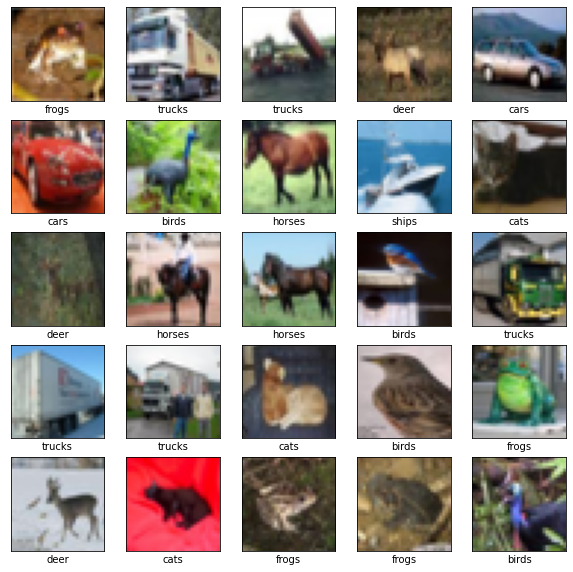

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=1

x_train_subset=x_train[11:12]
y_train_subset=y_train[11:12]

data_gen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True) # object 

train_gen=data_gen.flow(x_train_subset,y_train_subset,batch_size)

In [54]:
x_train_subset.shape

(1, 32, 32, 3)

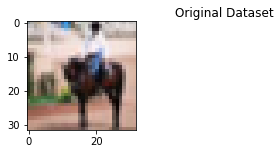

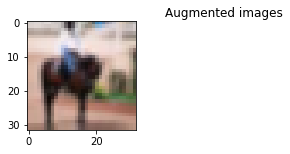

In [58]:


fig = plt.figure(figsize=(10,2))
for i in range(len(x_train_subset)):
  ax=fig.add_subplot(1,2,i+1)
  ax.imshow(x_train_subset[i])
fig.suptitle('Original Dataset')

fig=plt.figure(figsize=(10,2))
for x_batch in train_gen:
  for i in range(1):
    ax=fig.add_subplot(1,2,i+1)
    ax.imshow(x_batch[0][i])
  fig.suptitle('Augmented images')
  plt.show();
  break

In [14]:
x_batch[0].shape

(12, 32, 32, 3)

In [ ]:
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
i=Input(shape=(x_train[0].shape))
# x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
# x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
# x=Conv2D(128,(3,3),strides=2,activation='relu')(x)

x=Conv2D(32, (3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32, (3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(64, (3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64, (3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(128, (3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128, (3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(class_count,activation='softmax')(x)


model=Model(i,x)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0   

In [ ]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 1.3335 - accuracy: 0.5384 - val_loss: 0.9687 - val_accuracy: 0.6675
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8576 - accuracy: 0.7030 - val_loss: 0.8797 - val_accuracy: 0.6997
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6911 - accuracy: 0.7636 - val_loss: 0.7083 - val_accuracy: 0.7583
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5834 - accuracy: 0.8018 - val_loss: 0.7179 - val_accuracy: 0.7572
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4956 - accuracy: 0.8294 - val_loss: 0.6585 - val_accuracy: 0.7796
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4173 - accuracy: 0.8562 - val_loss: 0.6419 - val_accuracy: 0.7946
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3552 - accuracy: 0.8775 - val_loss: 0.5902 - val_ac

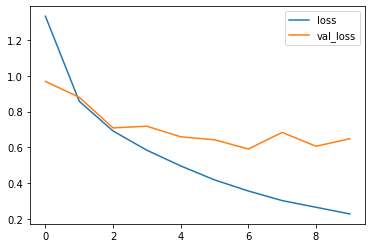

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

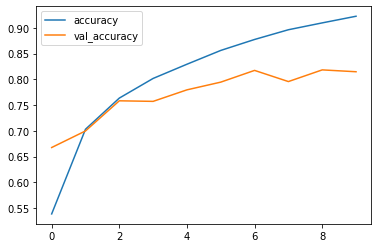

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()

313/313 [==============================] - 1s 3ms/step


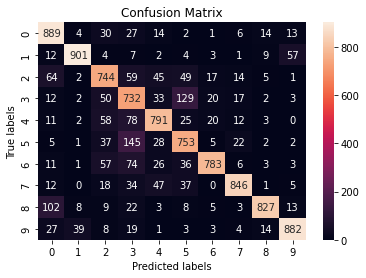

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


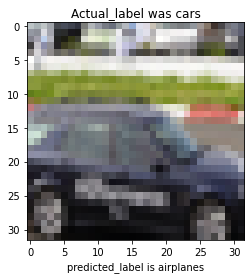

In [ ]:
i=np.random.choice(np.where(y_test!=y_pred)[0])


plt.imshow(x_test[i],cmap='gray')
plt.title('Actual_label was '+str(class_names[y_test[i]]))
plt.xlabel('predicted_label is ' + str(class_names[y_pred[i]]))
plt.show();

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=32


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=32

data_gen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True) # object 

train_gen=data_gen.flow(x_train,y_train,batch_size)

steps_per_epoch = x_train.shape[0]//batch_size

#train (x_train,y_train)

r=model.fit(train_gen,steps_per_epoch=steps_per_epoch,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1562/1562 [==============================] - 38s 23ms/step - loss: 1.4605 - accuracy: 0.4925 - val_loss: 1.6975 - val_accuracy: 0.4268
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.0018 - accuracy: 0.6498 - val_loss: 0.9829 - val_accuracy: 0.6758
Epoch 3/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.8594 - accuracy: 0.7041 - val_loss: 0.7795 - val_accuracy: 0.7316
Epoch 4/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.7517 - accuracy: 0.7449 - val_loss: 0.8560 - val_accuracy: 0.7228
Epoch 5/10
1562/1562 [==============================] - 36s 23ms/step - loss: 0.6873 - accuracy: 0.7654 - val_loss: 0.7788 - val_accuracy: 0.7473
Epoch 6/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6342 - accuracy: 0.7837 - val_loss: 0.6428 - val_accuracy: 0.7897
Epoch 7/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.5869 - accuracy: 0.7998 - val_loss: 0.6742 -

In [ ]:
# visualize data augmentation

In [ ]:
x_train_ss=x_train[:10]

fig=plt.figure(figsize=(20,2))

for i in range(len(x_train_ss)):
  


<Figure size 1440x144 with 0 Axes>